In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np

In [13]:
df = pd.read_csv("SCpRB.csv")

In [59]:
df_cy = pd.read_csv("Cyclinaaa.csv")

In [6]:
df_cy.head()


,WellName,Drug,Target,Stage,Repeat no,ScreenName,ScreenID,PlateName,PlateID,MeasurementDate,...,Nucleus PCNA SER Hole 0 px,Nucleus PCNA SER Spot 0 px,Intensity Nucleus PCNA Mean,Intensity Nucleus cyclinA Mean,Intensity Ring Region ERKTR Mean,Intensity Nucleus Hoechst Mean,Intensity Nucleus ERKTR Mean,ERKTR ratio (log a.u.),Nuclear ratio,CyclinA intensity (log a.u.)
0,G17,Dabrafenib,BRAF,G1,1,210218 cyclinA rabbit,2606,Rabbit cyclinA,3916,2018-02-22T17:23:30Z,...,0.043453,0.057285,166.3690,103.868,26.6494,339.375,150.320,-0.751329332,-0.521138,2.016482
1,G19,Dabrafenib,BRAF,G1,1,210218 cyclinA rabbit,2606,Rabbit cyclinA,3916,2018-02-22T17:23:30Z,...,0.022901,0.036367,399.7840,126.490,53.4777,295.627,229.631,-0.632857796,-0.667359,2.102056
2,G18,Dabrafenib,BRAF,G1,1,210218 cyclinA rabbit,2606,Rabbit cyclinA,3916,2018-02-22T17:23:30Z,...,0.028784,0.045703,219.3850,174.588,67.5969,529.654,281.744,-0.619927896,-0.501893,2.242014
3,G20,Dabrafenib,BRAF,G1,1,210218 cyclinA rabbit,2606,Rabbit cyclinA,3916,2018-02-22T17:23:30Z,...,0.026647,0.023051,634.6780,105.683,136.2150,487.736,558.264,-0.612614688,-0.616869,2.024005
4,G20,Dabrafenib,BRAF,G1,1,210218 cyclinA rabbit,2606,Rabbit cyclinA,3916,2018-02-22T17:23:30Z,...,0.076860,0.064961,67.6947,159.790,40.9189,452.905,166.941,-0.61063906,-0.485554,2.203550


In [34]:
df.dtypes

WellName                              object
Stage                                 object
Drug                                  object
Target                                object
Conc (ug/ml)                         float64
uM                                   float64
ScreenName                            object
ScreenID                               int64
PlateName                             object
PlateID                                int64
MeasurementDate                       object
MeasurementID                          int64
Row                                    int64
Column                                 int64
Field                                  int64
Plane                                  int64
Timepoint                              int64
Object Number                          int64
X                                      int64
Y                                      int64
Bounding Box                          object
Intensity Nucleus pRB Mean           float64
 Intensity

In [17]:
df_cy.dtypes

WellName                                    object
Drug                                        object
Target                                      object
Stage                                       object
Repeat no                                    int64
ScreenName                                  object
ScreenID                                     int64
PlateName                                   object
PlateID                                      int64
MeasurementDate                             object
MeasurementID                                int64
Row                                          int64
Column                                       int64
Field                                        int64
Plane                                        int64
Timepoint                                    int64
Object Number                                int64
X                                            int64
Y                                            int64
Bounding Box                   

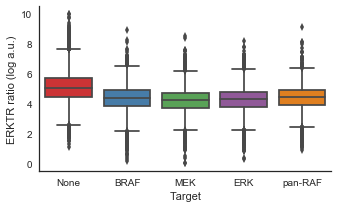

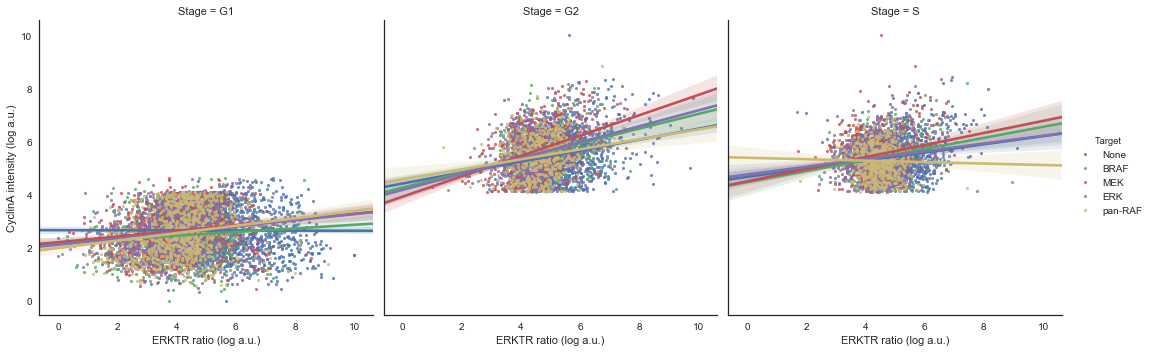

In [74]:
%matplotlib inline
sns.set_style("white")
sns.factorplot(
    data=df_cy,
    kind='box', 
    x='Target', 
    y='ERKTR ratio (log a.u.)', 
    order = ["None", "BRAF", "MEK", "ERK", "pan-RAF"],
    size=3, 
    aspect=1.6, # make it twice as wide as high
    palette='Set1' # use a nice categorical colour scheme
    )

sns.lmplot(x= 'ERKTR ratio (log a.u.)', 
           y = 'CyclinA intensity (log a.u.)', 
           hue = "Target", 
           col = "Stage",
           hue_order = ['None', 'BRAF', 'MEK', 'ERK', 'pan-RAF'],
           scatter_kws={"s": 10},  
           data = df_cy)

#plt.savefig('CyclinA.PDF')

#sns.lmplot(x= 'ERKTR ratio (log a.u.)', y = 'CylinA intensity (log a.u.)', 
        #   col = "Drug",
          # hue = "Stage",
          # data = df_cy)

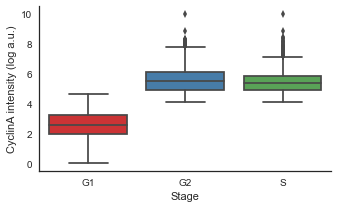

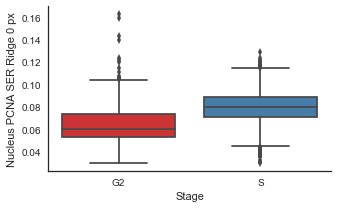

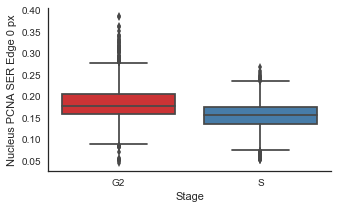

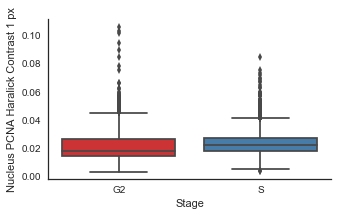

In [75]:
%matplotlib inline
sns.set_style("white")

sns.factorplot(
    data=df_cy,
    kind='box', 
    x='Stage', 
    y='CyclinA intensity (log a.u.)', 
    size=3, 
    aspect=1.6, # make it twice as wide as high
    palette='Set1' # use a nice categorical colour scheme
    )

S_G2 = df_cy[df_cy['Stage'] != "G1"]
sns.factorplot(
    data=S_G2,
    kind='box', 
    x='Stage', 
    y='Nucleus PCNA SER Ridge 0 px', 
    size=3, 
    aspect=1.6, # make it twice as wide as high
    palette='Set1' # use a nice categorical colour scheme
    )
sns.factorplot(
    data=S_G2,
    kind='box', 
    x='Stage', 
    y='Nucleus PCNA SER Edge 0 px', 
    size=3, 
    aspect=1.6, # make it twice as wide as high
    palette='Set1' # use a nice categorical colour scheme
    )
sns.factorplot(
    data=S_G2,
    kind='box', 
    x='Stage', 
    y='Nucleus PCNA Haralick Contrast 1 px', 
    size=3, 
    aspect=1.6, # make it twice as wide as high
    palette='Set1' # use a nice categorical colour scheme
    )

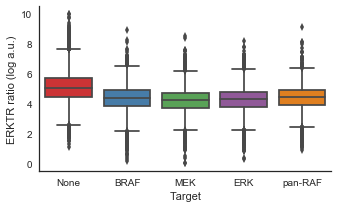

In [69]:
%matplotlib inline
sns.set_style("white")
sns.factorplot(
    data=df_cy,
    kind='box', 
    x='Target', 
    y='ERKTR ratio (log a.u.)', 
    order = ["None", "BRAF", "MEK", "ERK", "pan-RAF"],
    size=3, 
    aspect=1.6, # make it twice as wide as high
    palette='Set1' # use a nice categorical colour scheme
    )

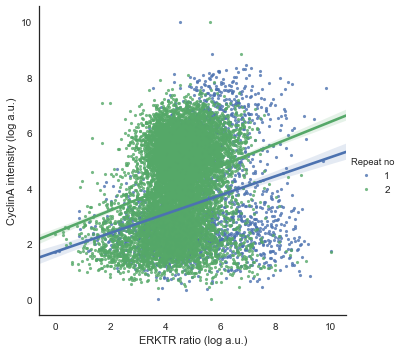

In [37]:
%matplotlib inline
sns.set_style("white")
df_cy2 = df_cy()
sns.lmplot(x= 'ERKTR ratio (log a.u.)', 
           y = 'CyclinA intensity (log a.u.)', 
           hue = "Repeat no",
           scatter_kws={"s": 10},  
           data = df_cy)

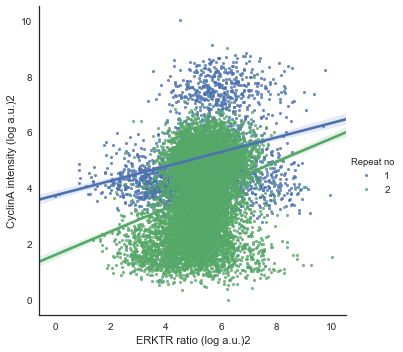

In [40]:
%matplotlib inline
sns.set_style("white")

sns.lmplot(x= 'ERKTR ratio (log a.u.)2', 
           y = 'CyclinA intensity (log a.u.)2', 
           hue = "Repeat no",
           scatter_kws={"s": 10},  
           data = df_cy)

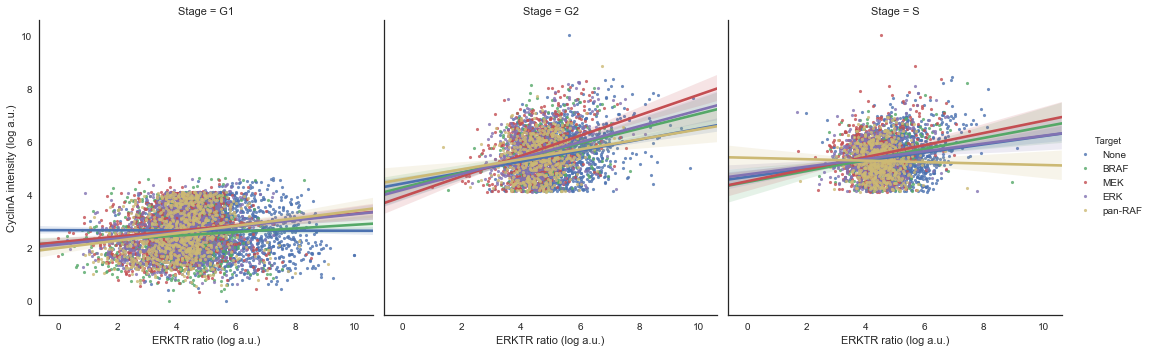

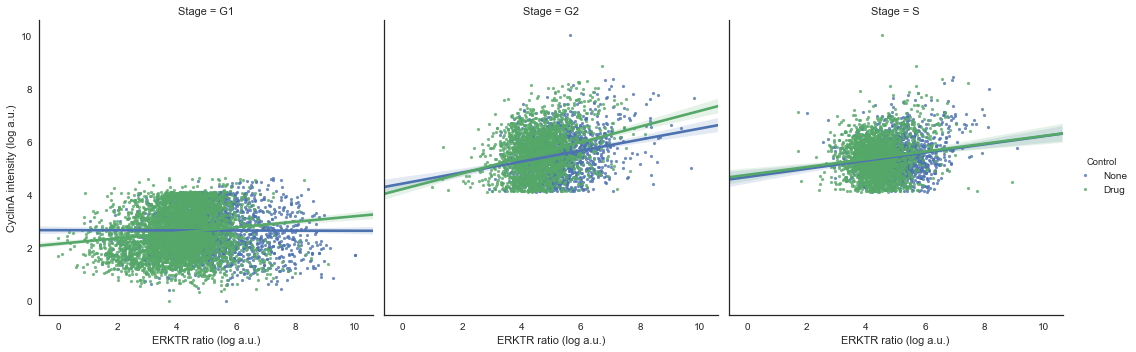

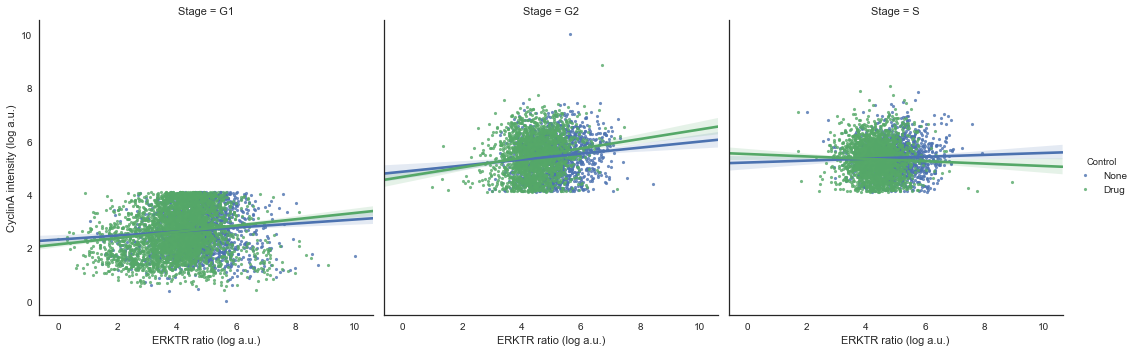

In [64]:
%matplotlib inline
sns.set_style("white")
sns.lmplot(x= 'ERKTR ratio (log a.u.)', 
           y = 'CyclinA intensity (log a.u.)', 
           hue = "Target", 
           col = "Stage", 
           scatter_kws={"s": 10},
           hue_order = ['None', 'BRAF', 'MEK', 'ERK', 'pan-RAF'],
           data = df_cy)

sns.lmplot(x= 'ERKTR ratio (log a.u.)', 
           y = 'CyclinA intensity (log a.u.)', 
           hue = "Control", 
           col = "Stage", 
           scatter_kws={"s": 10},
           hue_order = ['None', 'Drug'],
           data = df_cy)

Screen2 = df_cy[df_cy["ScreenName"] == "060318_cyclinA rabbit"]
sns.lmplot(x= 'ERKTR ratio (log a.u.)', 
           y = 'CyclinA intensity (log a.u.)', 
           hue = "Control", 
           col = "Stage", 
           scatter_kws={"s": 10},
           hue_order = ['None', 'Drug'],
           data = Screen2)


In [46]:
repeat2 = df_cy[df_cy['Repeat no'] == '2']

/Users/csimpson/anaconda/lib/python3.6/site-packages/pandas/core/ops.py:792: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

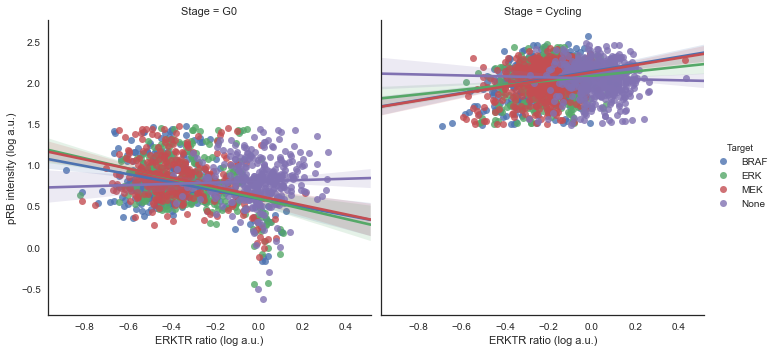

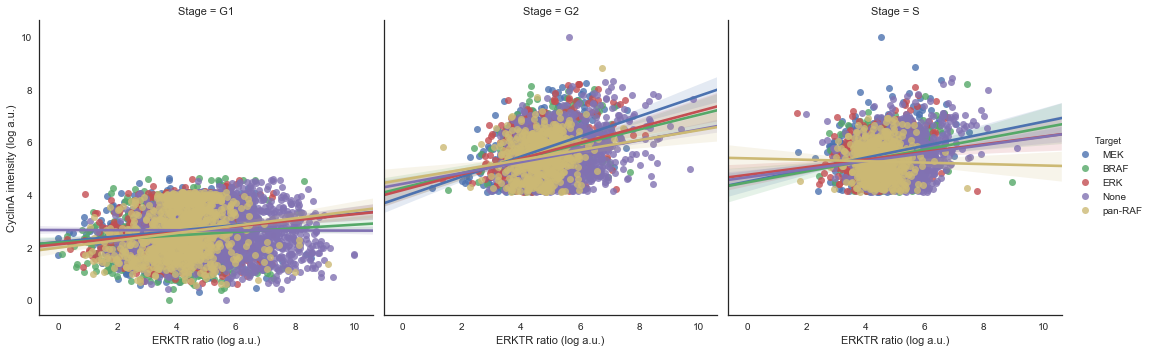

In [47]:
sns.lmplot(x= 'ERKTR ratio (log a.u.)', 
           y = 'pRB intensity (log a.u.)', 
           hue = "Target", 
           col = "Stage", 
           data = df,
           size=5)
plt.savefig("pRB.PDF")

sns.lmplot(x= 'ERKTR ratio (log a.u.)', 
           y = 'CyclinA intensity (log a.u.)', 
           hue = "Target", 
           col = "Stage", 
           data = df_cy,
           size=5)
#plt.savefig("cyclinA.PDF")

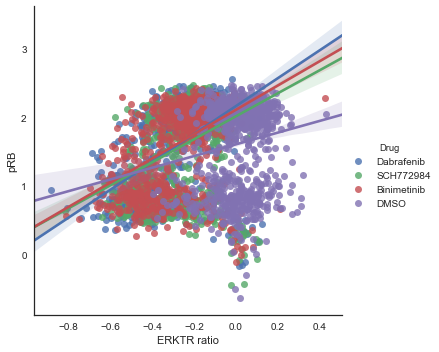

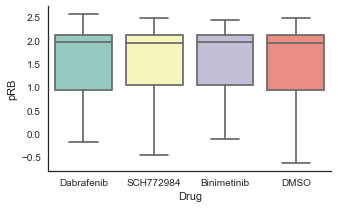

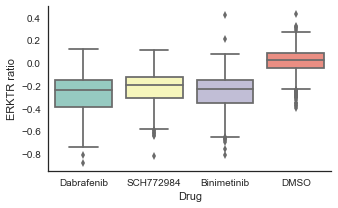

In [79]:
%matplotlib inline

sns.lmplot(x= 'ERKTR ratio', y = 'pRB', hue = "Drug", data = df)

sns.factorplot(
    data=df,
    kind='box', 
    x='Drug', 
    y='pRB', 
    size=3, 
    aspect=1.6, # make it twice as wide as high
    palette='Set3' # use a nice categorical colour scheme
)

sns.factorplot(
    data=df,
    kind='box', 
    x='Drug', 
    y='ERKTR ratio', 
    size=3, 
    aspect=1.6, # make it twice as wide as high
    palette='Set3' # use a nice categorical colour scheme
)

/Users/csimpson/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


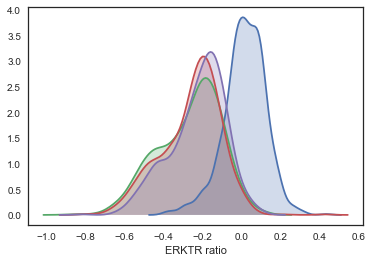

In [80]:
sns.set_style("white")
DMSO = df[df['Drug'] == 'DMSO']
sns.distplot(DMSO['ERKTR ratio'].dropna(), hist=False,kde_kws={"shade": True})
BRAFi = df[df['Drug'] == 'Dabrafenib']
sns.distplot(BRAFi['ERKTR ratio'].dropna(), hist=False,kde_kws={"shade": True})
MEKi = df[df['Drug'] == 'Binimetinib']
sns.distplot(MEKi['ERKTR ratio'].dropna(), hist=False,kde_kws={"shade": True})
ERKi = df[df['Drug'] == 'SCH772984']
sns.distplot(ERKi['ERKTR ratio'].dropna(), hist=False,kde_kws={"shade": True})

/Users/csimpson/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


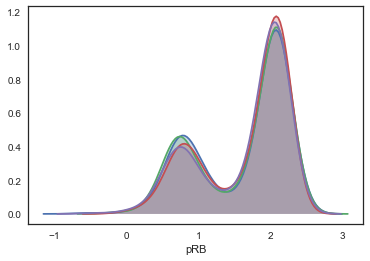

In [81]:
sns.set_style("white")
DMSO = df[df['Drug'] == 'DMSO']
sns.distplot(DMSO['pRB'].dropna(), hist=False,kde_kws={"shade": True})
BRAFi = df[df['Drug'] == 'Dabrafenib']
sns.distplot(BRAFi['pRB'].dropna(), hist=False,kde_kws={"shade": True})
MEKi = df[df['Drug'] == 'Binimetinib']
sns.distplot(MEKi['pRB'].dropna(), hist=False,kde_kws={"shade": True})
ERKi = df[df['Drug'] == 'SCH772984']
sns.distplot(ERKi['pRB'].dropna(), hist=False,kde_kws={"shade": True})

In [31]:
DMSO_lowpRB = DMSO[DMSO['pRB'] < 1.25]
DMSO_highpRB = DMSO[DMSO['pRB'] > 1.25]
BRAFi_lowpRB = BRAFi[BRAFi['pRB'] < 1.25]
BRAFi_highpRB = BRAFi[BRAFi['pRB'] > 1.25]
MEKi_lowpRB = MEKi[MEKi['pRB'] < 1.25]
MEKi_highpRB = MEKi[MEKi['pRB'] > 1.25]
ERKi_lowpRB = ERKi[ERKi['pRB'] < 1.25]
ERKi_highpRB = ERKi[ERKi['pRB'] > 1.25]
all_lowpRB = df[df['pRB'] < 1.25]
all_highpRB = df[df['pRB'] > 1.25]

NameError: name 'DMSO' is not defined

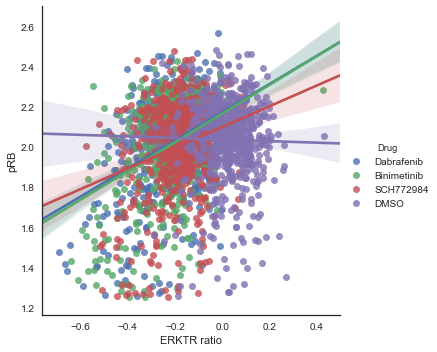

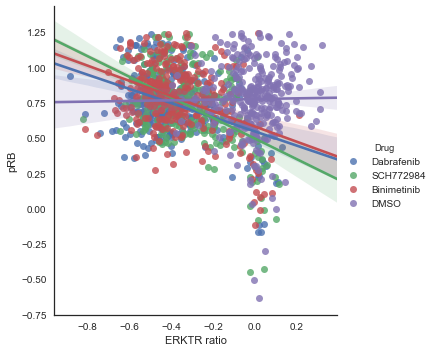

In [54]:
%matplotlib inline
sns.set_style("white")
sns.lmplot(x= 'ERKTR ratio', y = 'pRB', hue = "Drug", data = all_highpRB),
sns.lmplot(x= 'ERKTR ratio', y = 'pRB', hue = "Drug", data = all_lowpRB)